Your data exploration findings, initial hypothesis, and whether the hypothesis proved true.</br>
1. For numeric columns, there are too many colunms so I calculate the mean of each category and create new columns. Study shows that only the product view columns depend differently depending on the output. Therefore, I choose only 'avg_product_views' as the feature of prediction. </br>
2. For Categorical columns, after feature engineering, both marketing channel and gender depend differently depending on the output. For the location, it shows some dependency on output. </br>
</br>
initial hypothesis:</br>
Gender is a good predictive variables for conversion </br>
visitor_location and marketing channel can be performed grouping for better prediction </br>
For numeric columns, only the product view is a goof predictive variable </br>

The hypothesis proved true by looking at the plot</br>

Your approach for building and evaluating the model. </br>
Run the baseline of 5 models, split training and testing, extract the the prediction. Use the prediction to calculate the f1 score, then comparing their f1 score. Since the output is imbalance f1 score is better for evaluate the accuracy of the model. After that find the model with the highest f1 score, and check the cross validation result for the issue of overfitting.</br> 

The final model you selected and how you know this is the best model for the problem. </br>

Final model is the nb model, since it is having the highest f1 score, which mean it is the model with the highest accuracy. Moreover, the cross validation result of the baseline shows the f1 score are within 10%, which means no issue of overfitting.

How the model should be used by the business, in business process. </br>

The company can use the model to predict whether the customer will be converted by putting the value of the predictive variable and give them the special offer as promotion to increase the conversion rate.

In [287]:
df_clean.columns

Index(['index', 'Unnamed: 0', 'visitor_id', 'visitor_location',
       'marketing_channel', 'gender', 'product_views_Mon', 'product_views_Tue',
       'product_views_Wed', 'product_views_Thu', 'product_views_Fri',
       'avg_rating_Mon', 'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu',
       'avg_rating_Fri', 'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed',
       'avg_price_Thu', 'avg_price_Fri', 'time_on_site_Mon',
       'time_on_site_Tue', 'time_on_site_Wed', 'time_on_site_Thu',
       'time_on_site_Fri', 'pages_visited_Mon', 'pages_visited_Tue',
       'pages_visited_Wed', 'pages_visited_Thu', 'pages_visited_Fri',
       'converted_Fri', 'loc_e', 'mkt_e', 'avg_product_views', 'avg_rating',
       'avg_price', 'avg_time_on_site', 'avg_pages_visited', 'A', 'B', 'C',
       'Offline', 'Online', 'F', 'M', 'Asia', 'Australia', 'Europe',
       'North America', 'South America'],
      dtype='object')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [128]:
df = pd.read_csv(r"C:\Users\oscar\Downloads\conversion_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2000 non-null   int64  
 1   visitor_id         2000 non-null   int64  
 2   visitor_location   2000 non-null   object 
 3   marketing_channel  2000 non-null   object 
 4   gender             2000 non-null   object 
 5   product_views_Mon  2000 non-null   int64  
 6   product_views_Tue  2000 non-null   int64  
 7   product_views_Wed  2000 non-null   int64  
 8   product_views_Thu  2000 non-null   int64  
 9   product_views_Fri  2000 non-null   int64  
 10  avg_rating_Mon     2000 non-null   float64
 11  avg_rating_Tue     2000 non-null   float64
 12  avg_rating_Wed     2000 non-null   float64
 13  avg_rating_Thu     2000 non-null   float64
 14  avg_rating_Fri     2000 non-null   float64
 15  avg_price_Mon      2000 non-null   float64
 16  avg_price_Tue      2000 

Data cleaning

In [4]:
df.describe(include='all')

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
count,2000.000000,2000.000000,2000,2000,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
unique,NaN,NaN,5,5,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,South America,instagram,F,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,433,431,1093,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,999.500000,1000.500000,NaN,NaN,NaN,2.541500,2.440500,2.441000,2.256500,2.354000,...,39.776500,40.155500,40.417000,40.028500,3.946000,4.071000,4.092500,3.921000,4.089500,0.372000
std,577.494589,577.494589,NaN,NaN,NaN,1.704914,1.715206,2.343345,2.370974,2.335682,...,11.855624,11.757399,11.892638,11.664207,2.010001,2.012209,2.002985,2.023316,2.026954,0.483459
min,0.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,-4.000000,-3.000000,...,20.000000,20.000000,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,499.750000,500.750000,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,29.000000,30.000000,30.000000,30.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,999.500000,1000.500000,NaN,NaN,NaN,3.000000,2.000000,2.000000,2.000000,2.000000,...,40.000000,40.000000,40.500000,40.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
75%,1499.250000,1500.250000,NaN,NaN,NaN,4.000000,4.000000,4.000000,5.000000,5.000000,...,50.000000,50.000000,51.000000,50.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000


In [6]:
df.head(10)

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
0,0,1,North America,youtube,M,4,5,2,1,2,...,33,23,46,57,4,5,5,4,6,1
1,1,2,South America,organic,F,2,5,0,1,5,...,28,39,24,51,5,6,7,6,2,0
2,2,3,Australia,instagram,M,3,4,0,-3,5,...,34,22,34,31,1,3,3,2,3,1
3,3,4,North America,facebook,M,1,0,0,5,0,...,26,43,22,39,3,4,7,7,1,0
4,4,5,Asia,instagram,F,1,5,2,2,3,...,54,30,47,57,6,6,5,2,4,1
5,5,6,South America,organic,M,2,2,1,1,0,...,45,29,20,56,5,2,4,5,5,0
6,6,7,North America,instagram,M,1,1,0,5,5,...,53,55,33,45,1,3,5,7,3,1
7,7,8,Australia,youtube,F,2,1,6,0,0,...,39,22,33,55,2,1,3,5,4,0
8,8,9,Europe,youtube,M,4,2,0,0,3,...,41,42,39,36,4,3,4,7,1,0
9,9,10,Asia,organic,M,3,1,0,0,0,...,31,37,40,44,1,3,6,3,7,0


In [ ]:
# Drop duplicate rows and keep the first occurrence of each duplicated row
df.drop_duplicates(inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2000 non-null   int64  
 1   visitor_id         2000 non-null   int64  
 2   visitor_location   2000 non-null   object 
 3   marketing_channel  2000 non-null   object 
 4   gender             2000 non-null   object 
 5   product_views_Mon  2000 non-null   int64  
 6   product_views_Tue  2000 non-null   int64  
 7   product_views_Wed  2000 non-null   int64  
 8   product_views_Thu  2000 non-null   int64  
 9   product_views_Fri  2000 non-null   int64  
 10  avg_rating_Mon     2000 non-null   float64
 11  avg_rating_Tue     2000 non-null   float64
 12  avg_rating_Wed     2000 non-null   float64
 13  avg_rating_Thu     2000 non-null   float64
 14  avg_rating_Fri     2000 non-null   float64
 15  avg_price_Mon      2000 non-null   float64
 16  avg_price_Tue      2000 

No missing value and no incorrect data type, since 2000 entries with all the columns having non null value and each column holding numerica values are in the right data type. Moreover, there is no duplicated rows.

## EDA

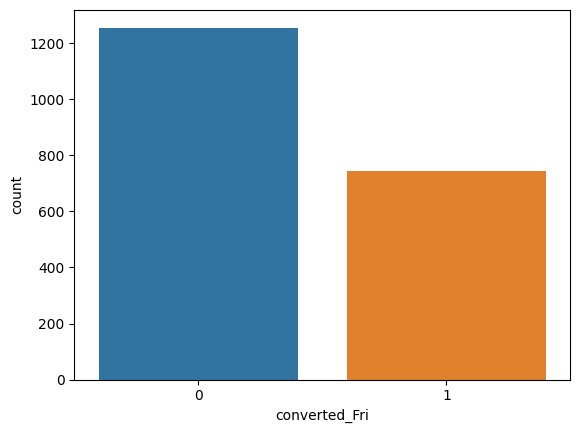

In [5]:
# Display the distribution of 'Survived'
sns.countplot(x='converted_Fri', data=df)
plt.show()

It shows the imbalance distribution of the target variable

In [7]:
# Drop duplicate rows and keep the first occurrence of each duplicated row
df.drop_duplicates(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2000 non-null   int64  
 1   visitor_id         2000 non-null   int64  
 2   visitor_location   2000 non-null   object 
 3   marketing_channel  2000 non-null   object 
 4   gender             2000 non-null   object 
 5   product_views_Mon  2000 non-null   int64  
 6   product_views_Tue  2000 non-null   int64  
 7   product_views_Wed  2000 non-null   int64  
 8   product_views_Thu  2000 non-null   int64  
 9   product_views_Fri  2000 non-null   int64  
 10  avg_rating_Mon     2000 non-null   float64
 11  avg_rating_Tue     2000 non-null   float64
 12  avg_rating_Wed     2000 non-null   float64
 13  avg_rating_Thu     2000 non-null   float64
 14  avg_rating_Fri     2000 non-null   float64
 15  avg_price_Mon      2000 non-null   float64
 16  avg_price_Tue      2000 

Data exploration

In [10]:
df.columns

Index(['Unnamed: 0', 'visitor_id', 'visitor_location', 'marketing_channel',
       'gender', 'product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri', 'converted_Fri'],
      dtype='object')

## Cat_columns

In [28]:
df.groupby('visitor_location').count()

,Unnamed: 0,visitor_id,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
visitor_location,,,,,,,,,,,,,,,,,,,,,
Asia,369,369,369,369,369,369,369,369,369,369,...,369,369,369,369,369,369,369,369,369,369
Australia,403,403,403,403,403,403,403,403,403,403,...,403,403,403,403,403,403,403,403,403,403
Europe,383,383,383,383,383,383,383,383,383,383,...,383,383,383,383,383,383,383,383,383,383
North America,412,412,412,412,412,412,412,412,412,412,...,412,412,412,412,412,412,412,412,412,412
South America,433,433,433,433,433,433,433,433,433,433,...,433,433,433,433,433,433,433,433,433,433


In [22]:
df.groupby(['visitor_location','marketing_channel'])['converted_Fri'].count().unstack()

marketing_channel,facebook,google,instagram,organic,youtube
visitor_location,,,,,
Asia,64,73,88,68,76
Australia,84,71,93,77,78
Europe,77,73,73,85,75
North America,82,89,78,88,75
South America,87,93,99,89,65


In [29]:
df.groupby(['visitor_location','gender'])['converted_Fri'].count().unstack()

gender,F,M
visitor_location,,
Asia,185,184
Australia,216,187
Europe,215,168
North America,231,181
South America,246,187


In [30]:
df.groupby('marketing_channel').count()

,Unnamed: 0,visitor_id,visitor_location,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
marketing_channel,,,,,,,,,,,,,,,,,,,,,
facebook,394,394,394,394,394,394,394,394,394,394,...,394,394,394,394,394,394,394,394,394,394
google,399,399,399,399,399,399,399,399,399,399,...,399,399,399,399,399,399,399,399,399,399
instagram,431,431,431,431,431,431,431,431,431,431,...,431,431,431,431,431,431,431,431,431,431
organic,407,407,407,407,407,407,407,407,407,407,...,407,407,407,407,407,407,407,407,407,407
youtube,369,369,369,369,369,369,369,369,369,369,...,369,369,369,369,369,369,369,369,369,369


In [38]:
df.groupby(['marketing_channel','gender'])['converted_Fri'].count().unstack()

gender,F,M
marketing_channel,,
facebook,198,196
google,228,171
instagram,225,206
organic,233,174
youtube,209,160


In [36]:
df.groupby('gender').count()

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
gender,,,,,,,,,,,,,,,,,,,,,
F,1093,1093,1093,1093,1093,1093,1093,1093,1093,1093,...,1093,1093,1093,1093,1093,1093,1093,1093,1093,1093
M,907,907,907,907,907,907,907,907,907,907,...,907,907,907,907,907,907,907,907,907,907


In [50]:
df.groupby(['converted_Fri','visitor_location'])['gender'].count().unstack()

visitor_location,Asia,Australia,Europe,North America,South America
converted_Fri,,,,,
0,231,268,235,267,255
1,138,135,148,145,178


<Axes: xlabel='converted_Fri'>

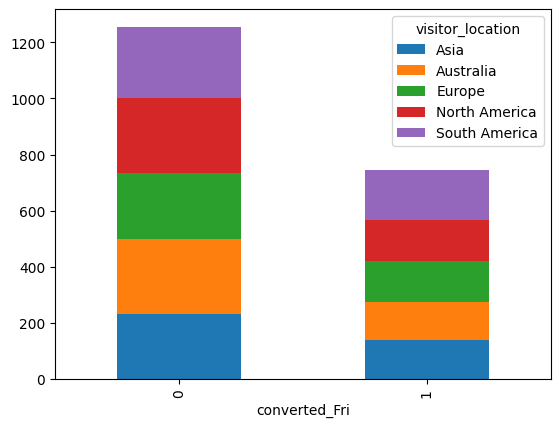

In [42]:
df.groupby(['converted_Fri','visitor_location'])['gender'].count().unstack().plot(kind='bar', stacked=True)

In [49]:
df.groupby(['converted_Fri','marketing_channel'])['gender'].count().unstack()

marketing_channel,facebook,google,instagram,organic,youtube
converted_Fri,,,,,
0,238,234,257,311,216
1,156,165,174,96,153


<Axes: xlabel='converted_Fri'>

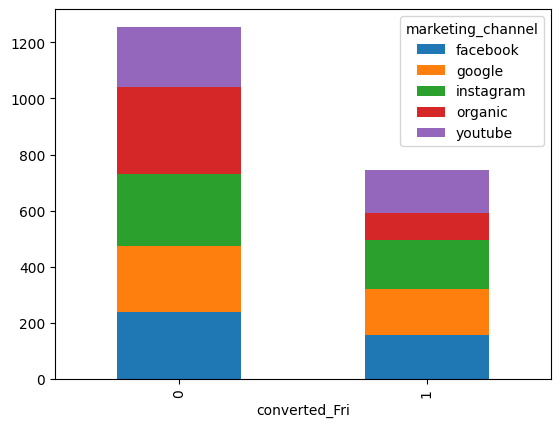

In [43]:
df.groupby(['converted_Fri','marketing_channel'])['gender'].count().unstack().plot(kind='bar', stacked=True)

In [48]:
df.groupby(['converted_Fri','gender'])['marketing_channel'].count().unstack()

gender,F,M
converted_Fri,,
0,602,654
1,491,253


<Axes: xlabel='converted_Fri'>

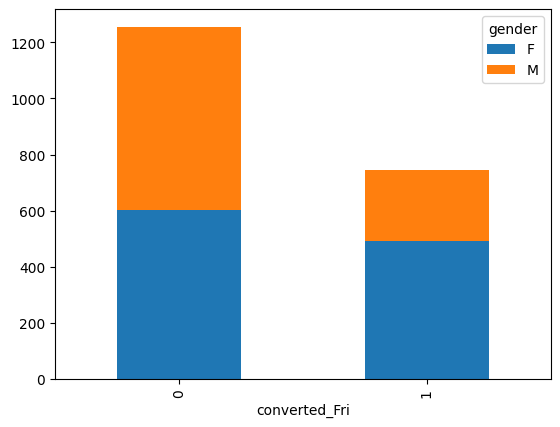

In [44]:
df.groupby(['converted_Fri','gender'])['marketing_channel'].count().unstack().plot(kind='bar', stacked=True)

# The study shows that gender is a good predictive variable when comparing to the other two cat columns. For Marketing channel, there is a chance for further grouping on online or offline catorgoreis. For location, the variable is not showing a strong sign on depending differently on the output, therefore, will try further group base on larger region. 

## Numeric Columns

<Axes: xlabel='converted_Fri', ylabel='product_views_Fri'>

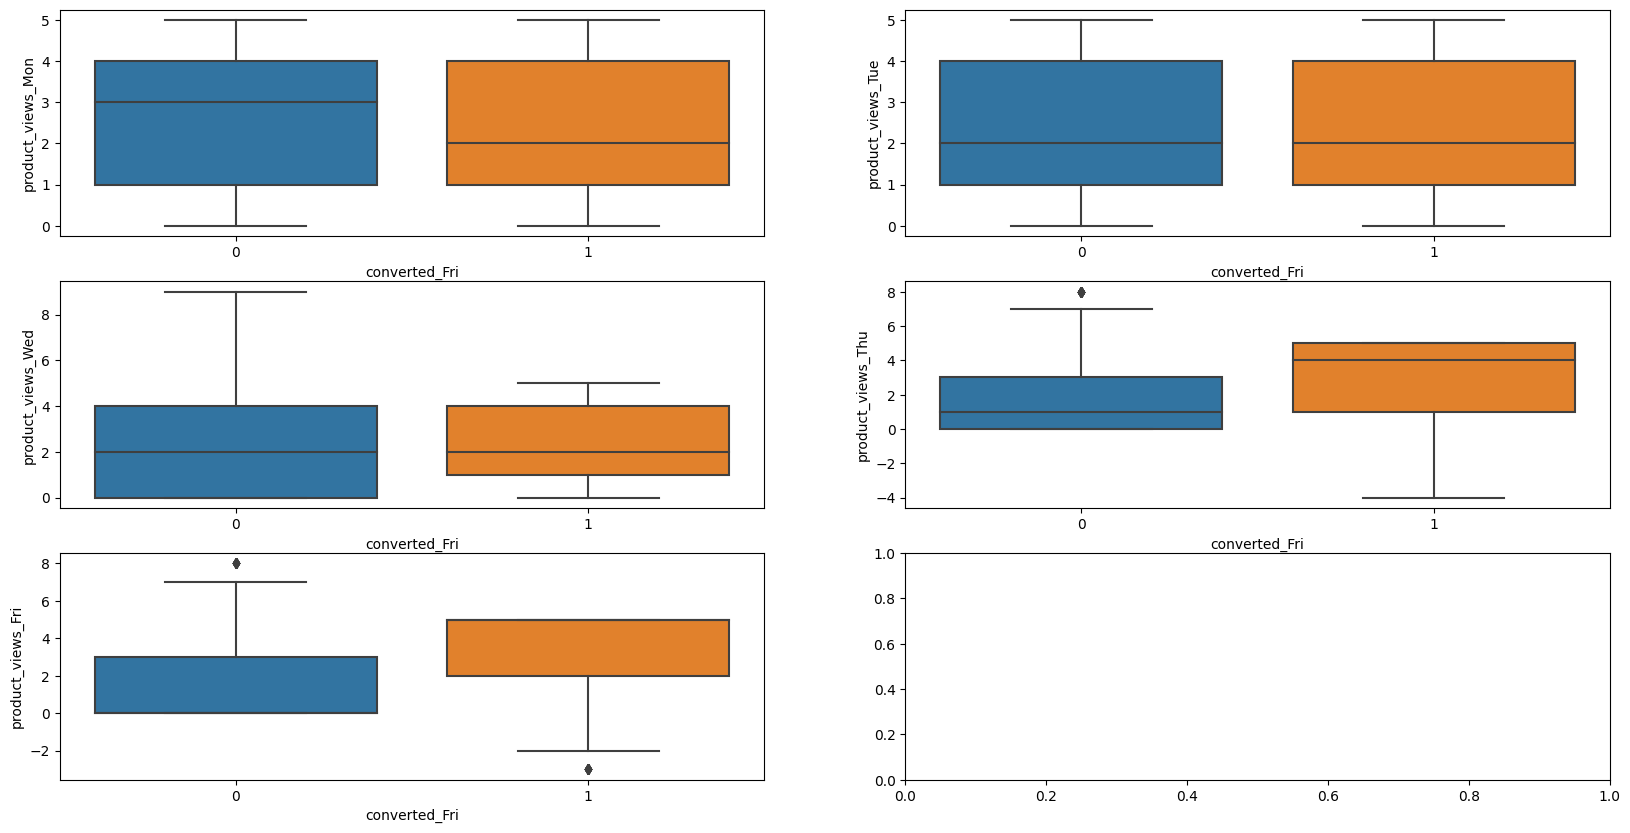

In [13]:
import seaborn as sns

fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6) ) = plt.subplots(3,2, figsize=(20,10))

sns.boxplot(x='converted_Fri',y='product_views_Mon', data=df, ax=ax1)
sns.boxplot(x='converted_Fri',y='product_views_Tue', data=df, ax=ax2)
sns.boxplot(x='converted_Fri',y='product_views_Wed', data=df, ax=ax3)
sns.boxplot(x='converted_Fri',y='product_views_Thu', data=df, ax=ax4)
sns.boxplot(x='converted_Fri',y='product_views_Fri', data=df, ax=ax5) 

<Axes: xlabel='converted_Fri', ylabel='avg_rating_Fri'>

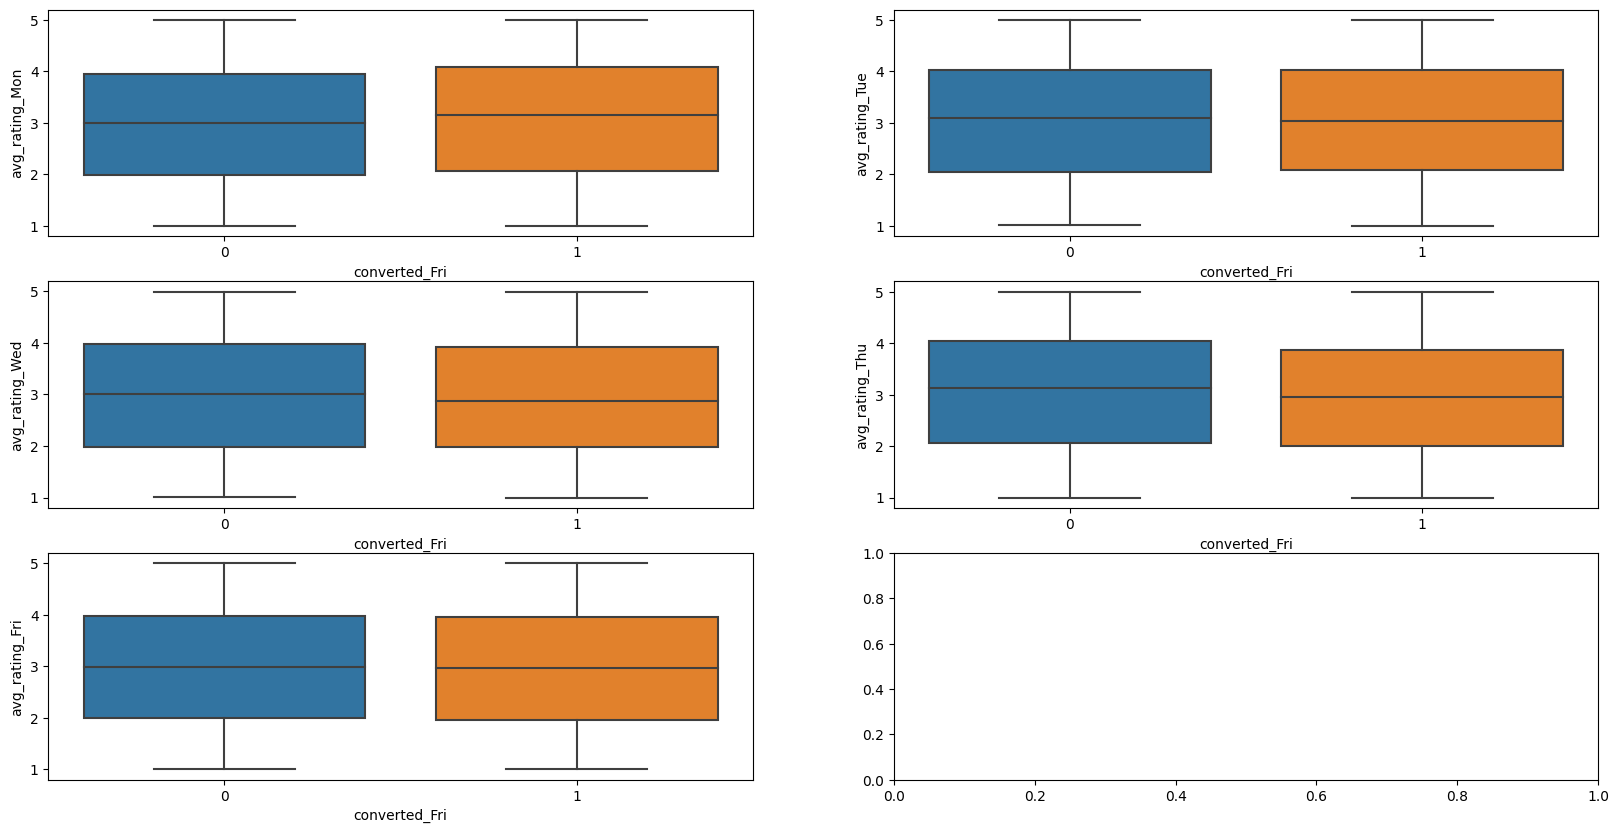

In [14]:
import seaborn as sns

fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6) ) = plt.subplots(3,2, figsize=(20,10))

sns.boxplot(x='converted_Fri',y='avg_rating_Mon', data=df, ax=ax1)
sns.boxplot(x='converted_Fri',y='avg_rating_Tue', data=df, ax=ax2)
sns.boxplot(x='converted_Fri',y='avg_rating_Wed', data=df, ax=ax3)
sns.boxplot(x='converted_Fri',y='avg_rating_Thu', data=df, ax=ax4)
sns.boxplot(x='converted_Fri',y='avg_rating_Fri', data=df, ax=ax5) 

<Axes: xlabel='converted_Fri', ylabel='avg_price_Fri'>

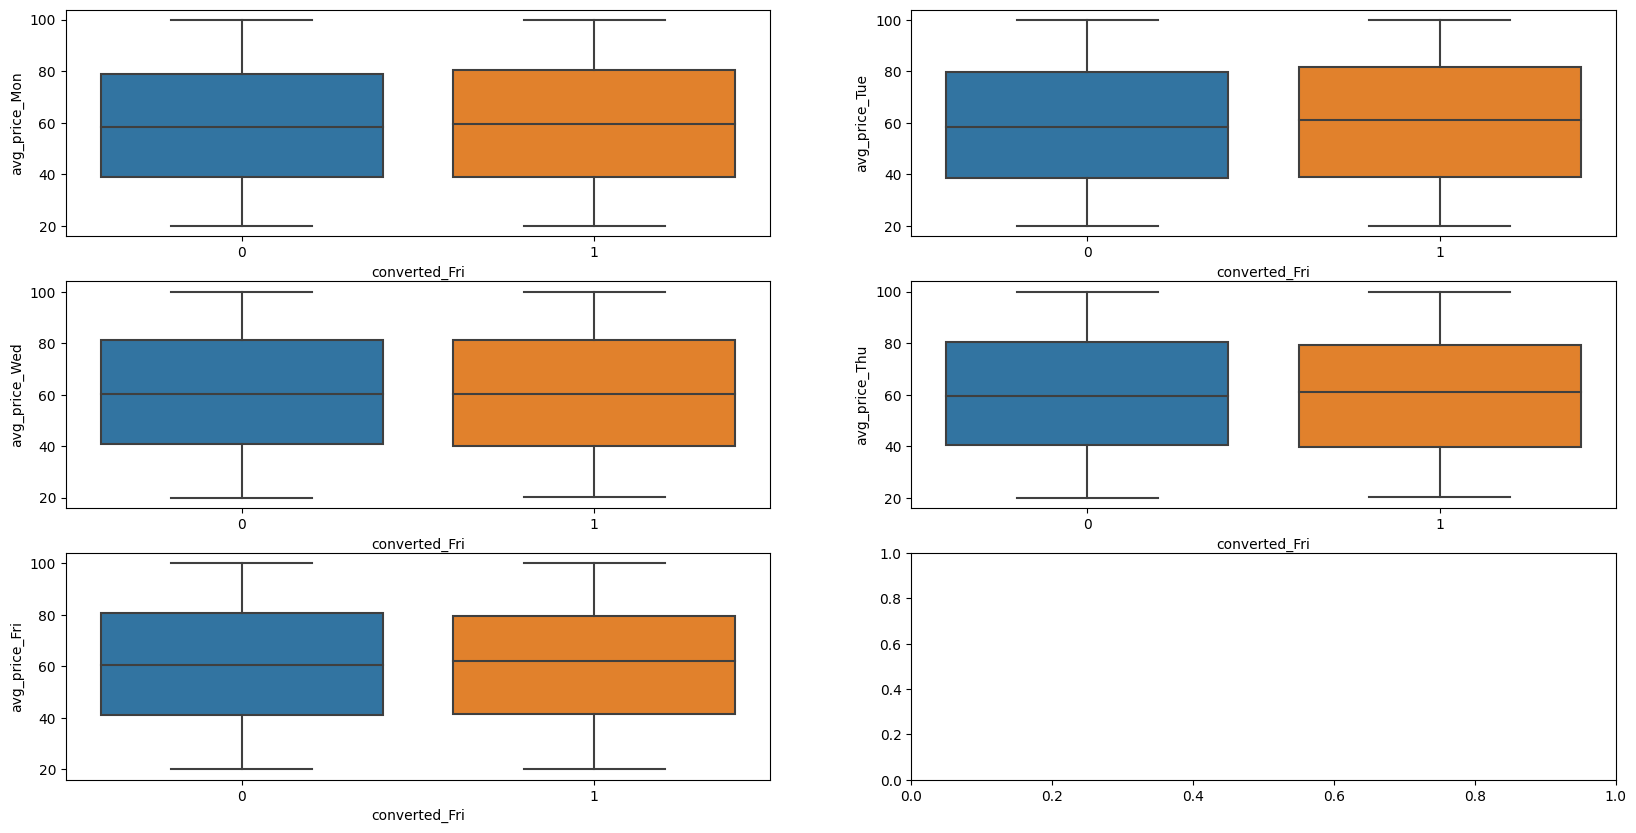

In [15]:
import seaborn as sns

fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6) ) = plt.subplots(3,2, figsize=(20,10))

sns.boxplot(x='converted_Fri',y='avg_price_Mon', data=df, ax=ax1)
sns.boxplot(x='converted_Fri',y='avg_price_Tue', data=df, ax=ax2)
sns.boxplot(x='converted_Fri',y='avg_price_Wed', data=df, ax=ax3)
sns.boxplot(x='converted_Fri',y='avg_price_Thu', data=df, ax=ax4)
sns.boxplot(x='converted_Fri',y='avg_price_Fri', data=df, ax=ax5) 

<Axes: xlabel='converted_Fri', ylabel='time_on_site_Fri'>

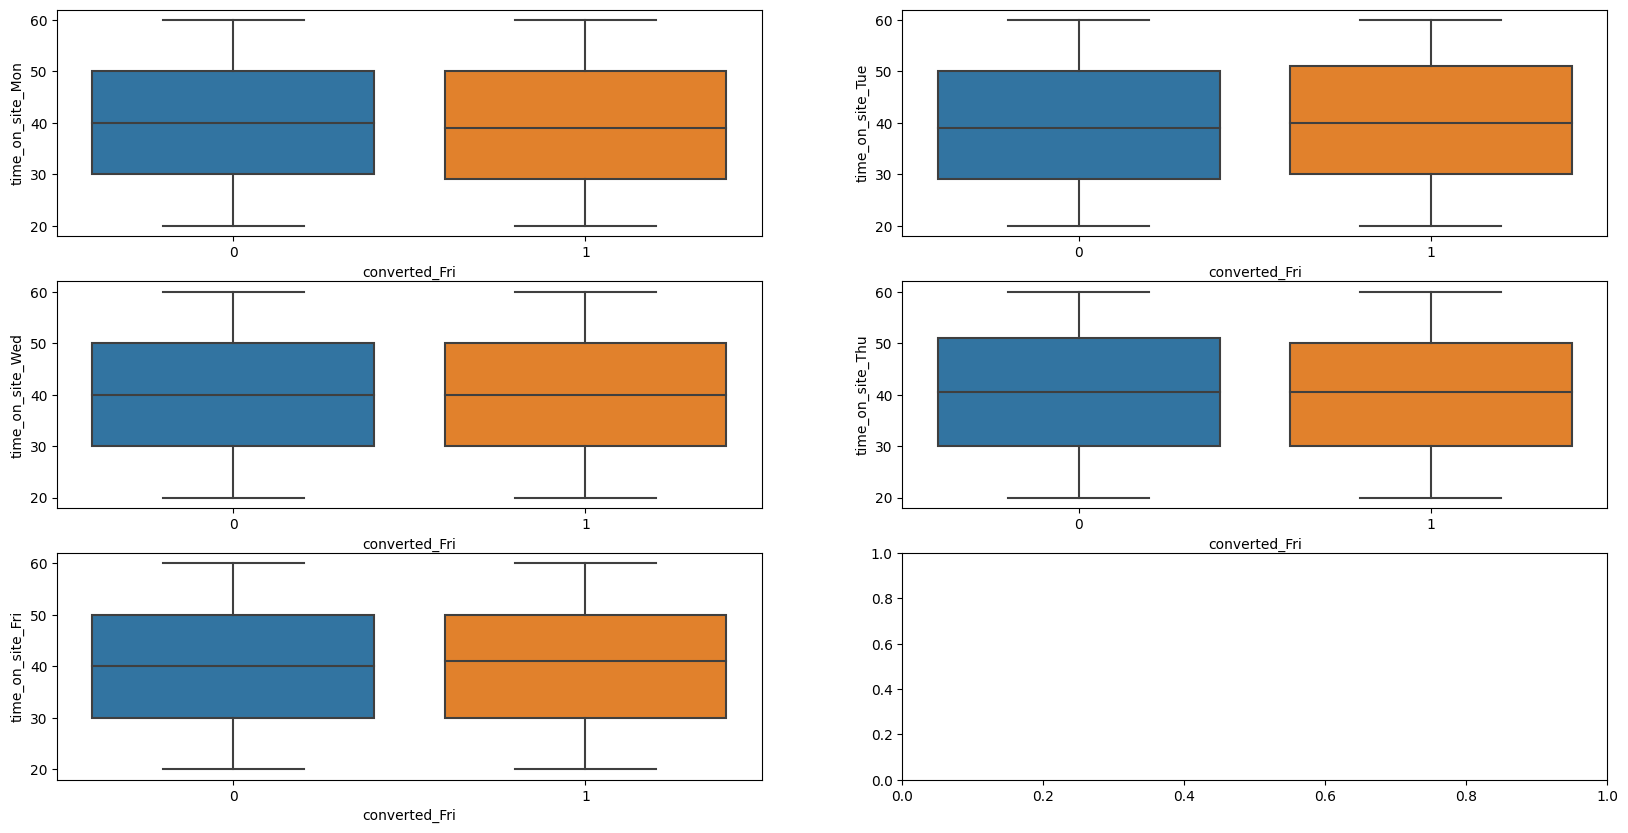

In [16]:
import seaborn as sns

fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6) ) = plt.subplots(3,2, figsize=(20,10))

sns.boxplot(x='converted_Fri',y='time_on_site_Mon', data=df, ax=ax1)
sns.boxplot(x='converted_Fri',y='time_on_site_Tue', data=df, ax=ax2)
sns.boxplot(x='converted_Fri',y='time_on_site_Wed', data=df, ax=ax3)
sns.boxplot(x='converted_Fri',y='time_on_site_Thu', data=df, ax=ax4)
sns.boxplot(x='converted_Fri',y='time_on_site_Fri', data=df, ax=ax5) 

<Axes: xlabel='converted_Fri', ylabel='pages_visited_Fri'>

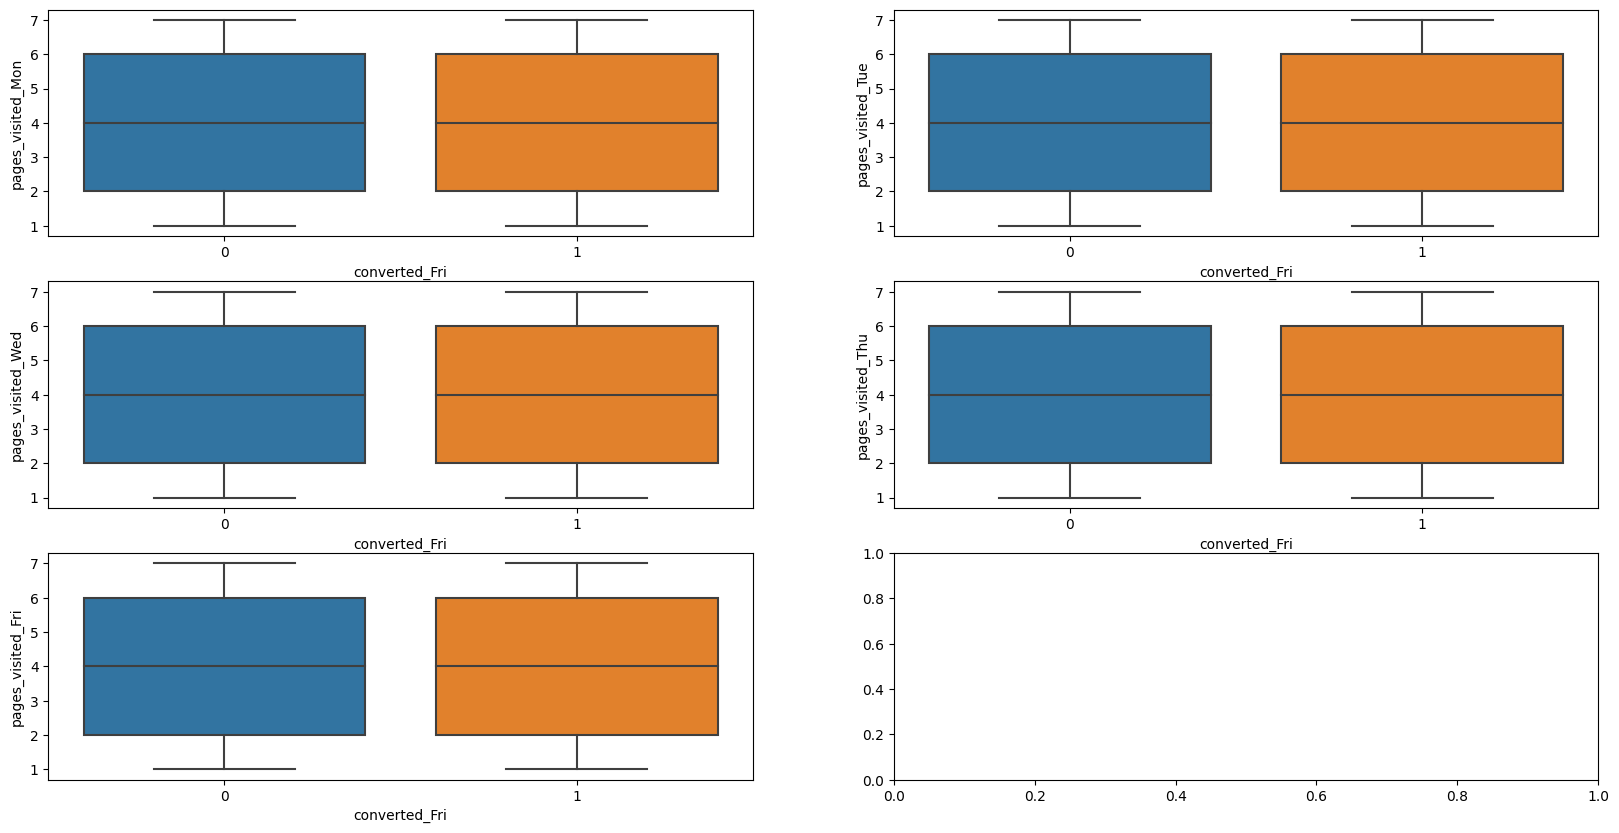

In [17]:
import seaborn as sns

fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6) ) = plt.subplots(3,2, figsize=(20,10))

sns.boxplot(x='converted_Fri',y='pages_visited_Mon', data=df, ax=ax1)
sns.boxplot(x='converted_Fri',y='pages_visited_Tue', data=df, ax=ax2)
sns.boxplot(x='converted_Fri',y='pages_visited_Wed', data=df, ax=ax3)
sns.boxplot(x='converted_Fri',y='pages_visited_Thu', data=df, ax=ax4)
sns.boxplot(x='converted_Fri',y='pages_visited_Fri', data=df, ax=ax5) 

# Since there are too many numeric columns, creating a new column by calculating a mean is good for prediction due to the similar mean of the columns.

In [129]:
df_t1 = df

In [131]:
df_t1 = df_t1.drop(df_t1[df_t1['product_views_Thu'] < 0].index)

df_t1 = df_t1.drop(df_t1[df_t1['product_views_Fri'] < 0].index)

df_t1 = df_t1.reset_index()

# Drop the record with negative number in product view, since it is not reasonable to have negative number on the number of product view.

In [132]:
df_t1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1859 entries, 0 to 1858
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              1859 non-null   int64  
 1   Unnamed: 0         1859 non-null   int64  
 2   visitor_id         1859 non-null   int64  
 3   visitor_location   1859 non-null   object 
 4   marketing_channel  1859 non-null   object 
 5   gender             1859 non-null   object 
 6   product_views_Mon  1859 non-null   int64  
 7   product_views_Tue  1859 non-null   int64  
 8   product_views_Wed  1859 non-null   int64  
 9   product_views_Thu  1859 non-null   int64  
 10  product_views_Fri  1859 non-null   int64  
 11  avg_rating_Mon     1859 non-null   float64
 12  avg_rating_Tue     1859 non-null   float64
 13  avg_rating_Wed     1859 non-null   float64
 14  avg_rating_Thu     1859 non-null   float64
 15  avg_rating_Fri     1859 non-null   float64
 16  avg_price_Mon      1859 

In [133]:
df_t1.describe(include='all')

,index,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
count,1859.000000,1859.000000,1859.000000,1859,1859,1859,1859.000000,1859.000000,1859.000000,1859.000000,...,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000
unique,NaN,NaN,NaN,5,5,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,South America,instagram,F,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,402,398,1006,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1001.627219,1001.627219,1002.627219,NaN,NaN,NaN,2.545992,2.440559,2.422808,2.414739,...,39.653039,40.194728,40.466380,39.916084,3.928456,4.076385,4.109736,3.922539,4.094137,0.324368
std,577.318456,577.318456,577.318456,NaN,NaN,NaN,1.708400,1.713334,2.386010,2.240785,...,11.901669,11.771861,11.920364,11.714281,2.005842,2.017303,2.011754,2.026047,2.030251,0.468264
min,0.000000,0.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,20.000000,20.000000,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,501.500000,501.500000,502.500000,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,...,29.000000,30.000000,30.000000,30.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,1002.000000,1002.000000,1003.000000,NaN,NaN,NaN,3.000000,2.000000,2.000000,2.000000,...,40.000000,40.000000,41.000000,40.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
75%,1500.500000,1500.500000,1501.500000,NaN,NaN,NaN,4.000000,4.000000,4.000000,5.000000,...,50.000000,50.000000,51.000000,50.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000


In [134]:
df.describe(include='all')

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
count,2000.000000,2000.000000,2000,2000,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
unique,NaN,NaN,5,5,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,South America,instagram,F,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,433,431,1093,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,999.500000,1000.500000,NaN,NaN,NaN,2.541500,2.440500,2.441000,2.256500,2.354000,...,39.776500,40.155500,40.417000,40.028500,3.946000,4.071000,4.092500,3.921000,4.089500,0.372000
std,577.494589,577.494589,NaN,NaN,NaN,1.704914,1.715206,2.343345,2.370974,2.335682,...,11.855624,11.757399,11.892638,11.664207,2.010001,2.012209,2.002985,2.023316,2.026954,0.483459
min,0.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,-4.000000,-3.000000,...,20.000000,20.000000,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,499.750000,500.750000,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,29.000000,30.000000,30.000000,30.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,999.500000,1000.500000,NaN,NaN,NaN,3.000000,2.000000,2.000000,2.000000,2.000000,...,40.000000,40.000000,40.500000,40.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
75%,1499.250000,1500.250000,NaN,NaN,NaN,4.000000,4.000000,4.000000,5.000000,5.000000,...,50.000000,50.000000,51.000000,50.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000


In [135]:
df_t1.columns

Index(['index', 'Unnamed: 0', 'visitor_id', 'visitor_location',
       'marketing_channel', 'gender', 'product_views_Mon', 'product_views_Tue',
       'product_views_Wed', 'product_views_Thu', 'product_views_Fri',
       'avg_rating_Mon', 'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu',
       'avg_rating_Fri', 'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed',
       'avg_price_Thu', 'avg_price_Fri', 'time_on_site_Mon',
       'time_on_site_Tue', 'time_on_site_Wed', 'time_on_site_Thu',
       'time_on_site_Fri', 'pages_visited_Mon', 'pages_visited_Tue',
       'pages_visited_Wed', 'pages_visited_Thu', 'pages_visited_Fri',
       'converted_Fri'],
      dtype='object')

In [136]:
df_clean = df_t1

For numeric column, only 'product_views_Wed', 'product_views_Thu' and 'product_views_Fri' is showing a different mean and distribution for the value od the target variable. For the others, the mean and the distribution of the value are showing nearly no differences.

### Hypothesis:
1. Gender is a good predictive variables for conversion </br>
2. visitor_location and marketing channel can be performed grouping for better prediction </br>
3. For numeric columns, only the product view is a goof predictive variable </br>

Festure Engineering.

In [137]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1859 entries, 0 to 1858
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              1859 non-null   int64  
 1   Unnamed: 0         1859 non-null   int64  
 2   visitor_id         1859 non-null   int64  
 3   visitor_location   1859 non-null   object 
 4   marketing_channel  1859 non-null   object 
 5   gender             1859 non-null   object 
 6   product_views_Mon  1859 non-null   int64  
 7   product_views_Tue  1859 non-null   int64  
 8   product_views_Wed  1859 non-null   int64  
 9   product_views_Thu  1859 non-null   int64  
 10  product_views_Fri  1859 non-null   int64  
 11  avg_rating_Mon     1859 non-null   float64
 12  avg_rating_Tue     1859 non-null   float64
 13  avg_rating_Wed     1859 non-null   float64
 14  avg_rating_Thu     1859 non-null   float64
 15  avg_rating_Fri     1859 non-null   float64
 16  avg_price_Mon      1859 

In [138]:
df_clean.columns

Index(['index', 'Unnamed: 0', 'visitor_id', 'visitor_location',
       'marketing_channel', 'gender', 'product_views_Mon', 'product_views_Tue',
       'product_views_Wed', 'product_views_Thu', 'product_views_Fri',
       'avg_rating_Mon', 'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu',
       'avg_rating_Fri', 'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed',
       'avg_price_Thu', 'avg_price_Fri', 'time_on_site_Mon',
       'time_on_site_Tue', 'time_on_site_Wed', 'time_on_site_Thu',
       'time_on_site_Fri', 'pages_visited_Mon', 'pages_visited_Tue',
       'pages_visited_Wed', 'pages_visited_Thu', 'pages_visited_Fri',
       'converted_Fri'],
      dtype='object')

Grouping for location

In [139]:
print(df_clean['visitor_location'].unique())

['North America' 'South America' 'Asia' 'Australia' 'Europe']


In [140]:
# create function for determining whether the game is having positive comment or not

def loc_cat(x):
    if x in ['North America', 'South America']:
        return 'A'
    elif x in ['Australia', 'Asia']:
        return 'B'
    else:
        return 'C'

A: Eastern, B: America, C: Europe

In [141]:
df_clean['loc_e'] = df_clean['visitor_location'].apply(loc_cat)

In [142]:
df_clean.groupby(['converted_Fri','loc_e'])['gender'].count().unstack()

loc_e,A,B,C
converted_Fri,,,
0,522,499,235
1,261,215,127


<Axes: xlabel='converted_Fri'>

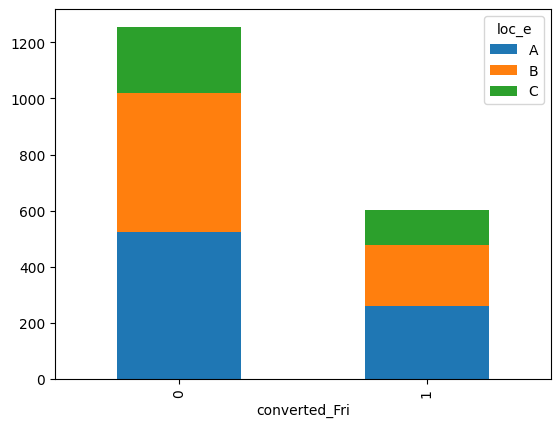

In [143]:
df_clean.groupby(['converted_Fri','loc_e'])['gender'].count().unstack().plot(kind='bar', stacked=True)

Grouping for marketing method

In [144]:
print(df_clean['marketing_channel'].unique())

['youtube' 'organic' 'facebook' 'instagram' 'google']


In [145]:
# create function for determining whether the game is having positive comment or not

def mkt_cat(x):
    if x in ['youtube', 'instagram', 'facebook', 'google']:
        return 'Online'
    else:
        return 'Offline'

In [146]:
df_clean['mkt_e'] = df_clean['marketing_channel'].apply(mkt_cat)

In [147]:
df_clean.groupby(['converted_Fri','mkt_e'])['gender'].count().unstack()

mkt_e,Offline,Online
converted_Fri,,
0,311,945
1,75,528


<Axes: xlabel='converted_Fri'>

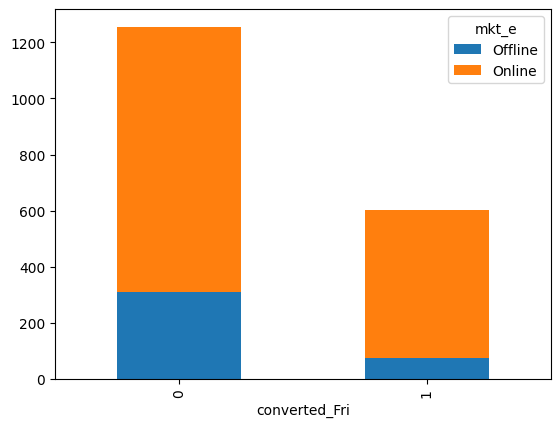

In [148]:
df_clean.groupby(['converted_Fri','mkt_e'])['gender'].count().unstack().plot(kind='bar', stacked=True)

In [149]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1859 entries, 0 to 1858
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              1859 non-null   int64  
 1   Unnamed: 0         1859 non-null   int64  
 2   visitor_id         1859 non-null   int64  
 3   visitor_location   1859 non-null   object 
 4   marketing_channel  1859 non-null   object 
 5   gender             1859 non-null   object 
 6   product_views_Mon  1859 non-null   int64  
 7   product_views_Tue  1859 non-null   int64  
 8   product_views_Wed  1859 non-null   int64  
 9   product_views_Thu  1859 non-null   int64  
 10  product_views_Fri  1859 non-null   int64  
 11  avg_rating_Mon     1859 non-null   float64
 12  avg_rating_Tue     1859 non-null   float64
 13  avg_rating_Wed     1859 non-null   float64
 14  avg_rating_Thu     1859 non-null   float64
 15  avg_rating_Fri     1859 non-null   float64
 16  avg_price_Mon      1859 

In [150]:
df_clean.columns

Index(['index', 'Unnamed: 0', 'visitor_id', 'visitor_location',
       'marketing_channel', 'gender', 'product_views_Mon', 'product_views_Tue',
       'product_views_Wed', 'product_views_Thu', 'product_views_Fri',
       'avg_rating_Mon', 'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu',
       'avg_rating_Fri', 'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed',
       'avg_price_Thu', 'avg_price_Fri', 'time_on_site_Mon',
       'time_on_site_Tue', 'time_on_site_Wed', 'time_on_site_Thu',
       'time_on_site_Fri', 'pages_visited_Mon', 'pages_visited_Tue',
       'pages_visited_Wed', 'pages_visited_Thu', 'pages_visited_Fri',
       'converted_Fri', 'loc_e', 'mkt_e'],
      dtype='object')

Creating new columns

In [151]:
df_clean['avg_product_views'] =  df_clean[['product_views_Mon', 'product_views_Tue', 'product_views_Wed', 'product_views_Thu', 'product_views_Fri']].mean(axis=1)

In [152]:
df_clean['avg_rating'] =  df_clean[['avg_rating_Mon', 'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri']].mean(axis=1)

In [153]:
df_clean['avg_price'] =  df_clean[['avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu', 'avg_price_Fri']].mean(axis=1)

In [154]:
df_clean['avg_time_on_site'] =  df_clean[['time_on_site_Mon', 'time_on_site_Tue', 'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri']].mean(axis=1)

In [155]:
df_clean['avg_pages_visited'] =  df_clean[['pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed', 'pages_visited_Thu', 'pages_visited_Fri']].mean(axis=1)

In [156]:
df_clean.describe(include='all')

,index,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,...,pages_visited_Thu,pages_visited_Fri,converted_Fri,loc_e,mkt_e,avg_product_views,avg_rating,avg_price,avg_time_on_site,avg_pages_visited
count,1859.000000,1859.000000,1859.000000,1859,1859,1859,1859.000000,1859.000000,1859.000000,1859.000000,...,1859.000000,1859.000000,1859.000000,1859,1859,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000
unique,NaN,NaN,NaN,5,5,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,South America,instagram,F,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,A,Online,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,402,398,1006,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,783,1473,NaN,NaN,NaN,NaN,NaN
mean,1001.627219,1001.627219,1002.627219,NaN,NaN,NaN,2.545992,2.440559,2.422808,2.414739,...,3.922539,4.094137,0.324368,NaN,NaN,2.448521,3.005131,60.057214,40.008822,4.026251
std,577.318456,577.318456,577.318456,NaN,NaN,NaN,1.708400,1.713334,2.386010,2.240785,...,2.026047,2.030251,0.468264,NaN,NaN,0.966585,0.522168,10.204448,5.136225,0.903789
min,0.000000,0.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,NaN,NaN,0.000000,1.472000,27.520000,24.000000,1.800000
25%,501.500000,501.500000,502.500000,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,...,2.000000,2.000000,0.000000,NaN,NaN,1.800000,2.654000,52.752000,36.600000,3.400000
50%,1002.000000,1002.000000,1003.000000,NaN,NaN,NaN,3.000000,2.000000,2.000000,2.000000,...,4.000000,4.000000,0.000000,NaN,NaN,2.400000,2.996000,59.982000,40.000000,4.000000
75%,1500.500000,1500.500000,1501.500000,NaN,NaN,NaN,4.000000,4.000000,4.000000,5.000000,...,6.000000,6.000000,1.000000,NaN,NaN,3.200000,3.369000,66.784000,43.600000,4.600000


<Axes: xlabel='converted_Fri', ylabel='avg_pages_visited'>

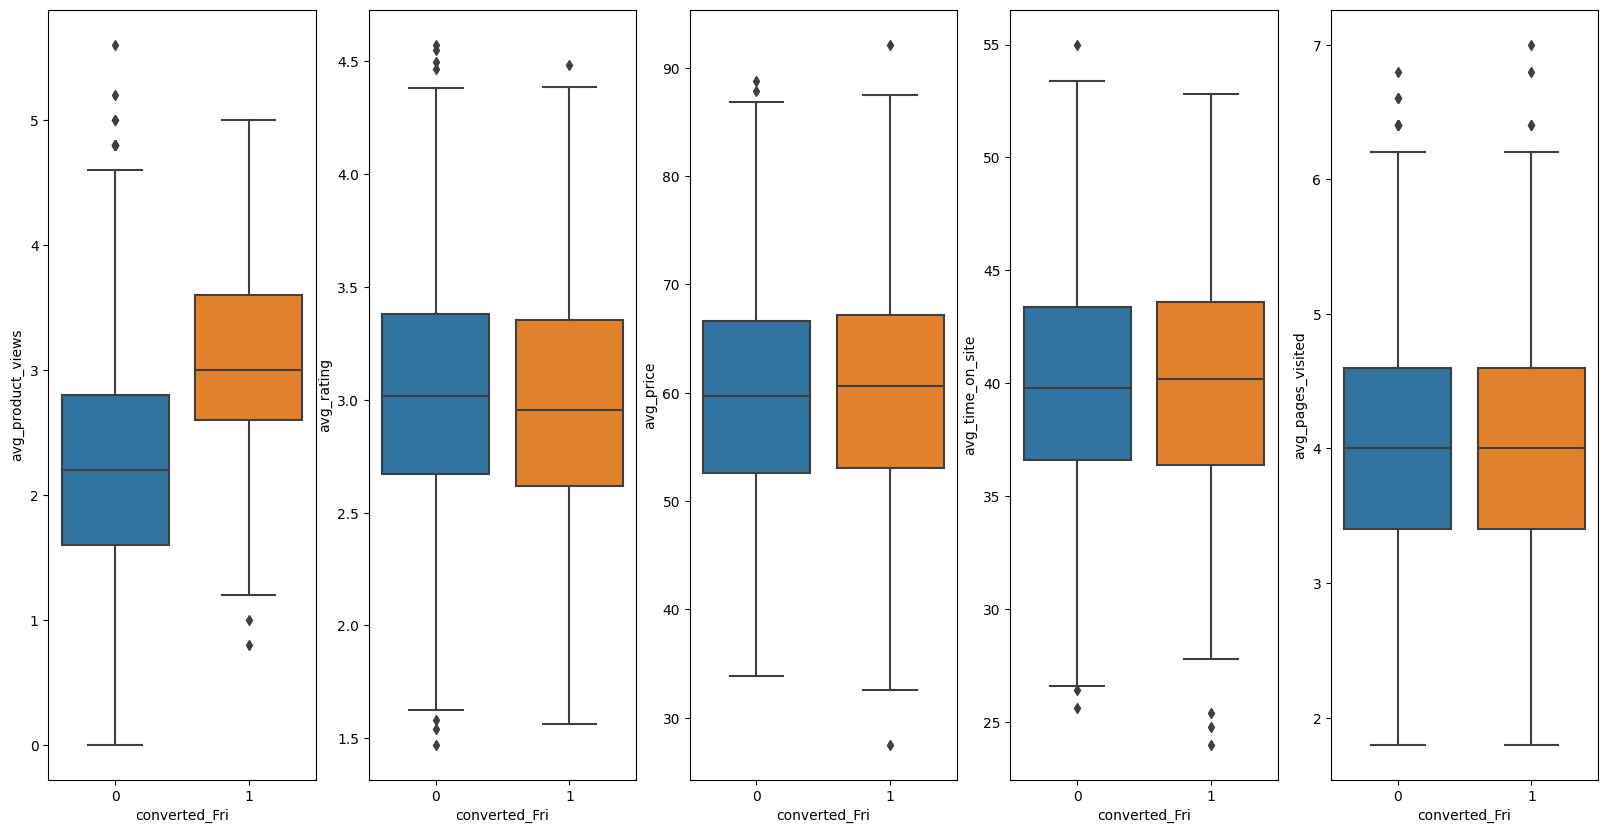

In [158]:
import seaborn as sns

fig, ((ax1, ax2, ax3, ax4,ax5) ) = plt.subplots(1,5, figsize=(20,10))

sns.boxplot(x='converted_Fri',y='avg_product_views', data=df_clean, ax=ax1)
sns.boxplot(x='converted_Fri',y='avg_rating', data=df_clean, ax=ax2)
sns.boxplot(x='converted_Fri',y='avg_price', data=df_clean, ax=ax3)
sns.boxplot(x='converted_Fri',y='avg_time_on_site', data=df_clean, ax=ax4)
sns.boxplot(x='converted_Fri',y='avg_pages_visited', data=df_clean, ax=ax5) 

The plot shows that only avg_product_views depends differently depending on the output.

In [163]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1859 entries, 0 to 1858
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              1859 non-null   int64  
 1   Unnamed: 0         1859 non-null   int64  
 2   visitor_id         1859 non-null   int64  
 3   visitor_location   1859 non-null   object 
 4   marketing_channel  1859 non-null   object 
 5   gender             1859 non-null   object 
 6   product_views_Mon  1859 non-null   int64  
 7   product_views_Tue  1859 non-null   int64  
 8   product_views_Wed  1859 non-null   int64  
 9   product_views_Thu  1859 non-null   int64  
 10  product_views_Fri  1859 non-null   int64  
 11  avg_rating_Mon     1859 non-null   float64
 12  avg_rating_Tue     1859 non-null   float64
 13  avg_rating_Wed     1859 non-null   float64
 14  avg_rating_Thu     1859 non-null   float64
 15  avg_rating_Fri     1859 non-null   float64
 16  avg_price_Mon      1859 

In [159]:
df_clean.columns

Index(['index', 'Unnamed: 0', 'visitor_id', 'visitor_location',
       'marketing_channel', 'gender', 'product_views_Mon', 'product_views_Tue',
       'product_views_Wed', 'product_views_Thu', 'product_views_Fri',
       'avg_rating_Mon', 'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu',
       'avg_rating_Fri', 'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed',
       'avg_price_Thu', 'avg_price_Fri', 'time_on_site_Mon',
       'time_on_site_Tue', 'time_on_site_Wed', 'time_on_site_Thu',
       'time_on_site_Fri', 'pages_visited_Mon', 'pages_visited_Tue',
       'pages_visited_Wed', 'pages_visited_Thu', 'pages_visited_Fri',
       'converted_Fri', 'loc_e', 'mkt_e', 'avg_product_views', 'avg_rating',
       'avg_price', 'avg_time_on_site', 'avg_pages_visited'],
      dtype='object')

In [160]:
# Create tags dummies
loc_dummies = pd.get_dummies(df_clean['loc_e'])

In [161]:
loc_dummies

,A,B,C
0,True,False,False
1,True,False,False
2,True,False,False
3,False,True,False
4,True,False,False
...,...,...,...
1854,False,False,True
1855,True,False,False
1856,False,True,False
1857,True,False,False


In [162]:
# concat the columns
df_clean = pd.concat([df_clean,loc_dummies], axis=1)

In [164]:
# Create tags dummies
mkt_dummies = pd.get_dummies(df_clean['mkt_e'])

In [165]:
mkt_dummies

,Offline,Online
0,False,True
1,True,False
2,False,True
3,False,True
4,True,False
...,...,...
1854,True,False
1855,False,True
1856,False,True
1857,False,True


In [166]:
# concat the columns
df_clean = pd.concat([df_clean,mkt_dummies], axis=1)

In [167]:
gender_dummies = pd.get_dummies(df_clean['gender'])

In [168]:
gender_dummies

,F,M
0,False,True
1,True,False
2,False,True
3,True,False
4,False,True
...,...,...
1854,True,False
1855,False,True
1856,False,True
1857,True,False


In [169]:
# concat the columns
df_clean = pd.concat([df_clean,gender_dummies], axis=1)

In [170]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1859 entries, 0 to 1858
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              1859 non-null   int64  
 1   Unnamed: 0         1859 non-null   int64  
 2   visitor_id         1859 non-null   int64  
 3   visitor_location   1859 non-null   object 
 4   marketing_channel  1859 non-null   object 
 5   gender             1859 non-null   object 
 6   product_views_Mon  1859 non-null   int64  
 7   product_views_Tue  1859 non-null   int64  
 8   product_views_Wed  1859 non-null   int64  
 9   product_views_Thu  1859 non-null   int64  
 10  product_views_Fri  1859 non-null   int64  
 11  avg_rating_Mon     1859 non-null   float64
 12  avg_rating_Tue     1859 non-null   float64
 13  avg_rating_Wed     1859 non-null   float64
 14  avg_rating_Thu     1859 non-null   float64
 15  avg_rating_Fri     1859 non-null   float64
 16  avg_price_Mon      1859 

In [275]:
location_dummies = pd.get_dummies(df_clean['visitor_location'])

In [276]:
location_dummies

,Asia,Australia,Europe,North America,South America
0,False,False,False,True,False
1,False,False,False,False,True
2,False,False,False,True,False
3,True,False,False,False,False
4,False,False,False,False,True
...,...,...,...,...,...
1854,False,False,True,False,False
1855,False,False,False,False,True
1856,True,False,False,False,False
1857,False,False,False,False,True


In [277]:
# concat the columns
df_clean = pd.concat([df_clean,location_dummies], axis=1)

In [278]:
df_clean.columns

Index(['index', 'Unnamed: 0', 'visitor_id', 'visitor_location',
       'marketing_channel', 'gender', 'product_views_Mon', 'product_views_Tue',
       'product_views_Wed', 'product_views_Thu', 'product_views_Fri',
       'avg_rating_Mon', 'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu',
       'avg_rating_Fri', 'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed',
       'avg_price_Thu', 'avg_price_Fri', 'time_on_site_Mon',
       'time_on_site_Tue', 'time_on_site_Wed', 'time_on_site_Thu',
       'time_on_site_Fri', 'pages_visited_Mon', 'pages_visited_Tue',
       'pages_visited_Wed', 'pages_visited_Thu', 'pages_visited_Fri',
       'converted_Fri', 'loc_e', 'mkt_e', 'avg_product_views', 'avg_rating',
       'avg_price', 'avg_time_on_site', 'avg_pages_visited', 'A', 'B', 'C',
       'Offline', 'Online', 'F', 'M', 'Asia', 'Australia', 'Europe',
       'North America', 'South America'],
      dtype='object')

So all cat columns and the avg product view column will be the predictive variables

In [ ]:
X = df.iloc[:,:13]
Y = df.iloc[:, 13]

In [173]:
X = df.iloc[:,:46]

In [174]:
X

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
0,0,1,North America,youtube,M,4,5,2,1,2,...,33,23,46,57,4,5,5,4,6,1
1,1,2,South America,organic,F,2,5,0,1,5,...,28,39,24,51,5,6,7,6,2,0
2,2,3,Australia,instagram,M,3,4,0,-3,5,...,34,22,34,31,1,3,3,2,3,1
3,3,4,North America,facebook,M,1,0,0,5,0,...,26,43,22,39,3,4,7,7,1,0
4,4,5,Asia,instagram,F,1,5,2,2,3,...,54,30,47,57,6,6,5,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,1996,Europe,organic,F,3,0,0,4,2,...,22,51,44,29,5,1,5,7,7,0
1996,1996,1997,South America,google,M,1,2,0,4,1,...,54,33,59,38,1,6,6,7,6,0
1997,1997,1998,Asia,facebook,M,2,3,0,0,8,...,32,30,48,38,2,1,7,6,4,0
1998,1998,1999,South America,youtube,F,2,2,2,5,5,...,21,51,41,56,6,4,2,2,3,1


Model

In [171]:
log = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
svc = SVC()
dt = DecisionTreeClassifier()

In [236]:
# use the tags as the feature

X = np.array(df_clean[['avg_product_views','Offline','Online','F','M','A','B','C']])
y = np.array(df_clean['converted_Fri'])

In [252]:
# Assuming you have your data in X (features) and y (target) format
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [253]:
log.fit(X_train, y_train)
nb.fit(X_train, y_train)
knn.fit(X_train, y_train)
svc.fit(X_train, y_train)
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [254]:
pred_l = log.predict(X_test)
pred_nb = nb.predict(X_test)
pred_knn = knn.predict(X_test)
pred_svc = svc.predict(X_test)
pred_dt = dt.predict(X_test)

In [255]:
print(f1_score(y_test, pred_l))
print(f1_score(y_test, pred_nb))
print(f1_score(y_test, pred_knn))
print(f1_score(y_test, pred_svc))
print(f1_score(y_test, pred_dt))

0.5610859728506788
0.6566037735849056
0.48648648648648646
0.5420560747663551
0.4910714285714285


In [259]:
print(precision_score(y_test, pred_l))
print(precision_score(y_test, pred_nb))
print(precision_score(y_test, pred_knn))
print(precision_score(y_test, pred_svc))
print(precision_score(y_test, pred_dt))

0.7045454545454546
0.6590909090909091
0.6067415730337079
0.7160493827160493
0.6043956043956044


In [260]:
print(recall_score(y_test, pred_l))
print(recall_score(y_test, pred_nb))
print(recall_score(y_test, pred_knn))
print(recall_score(y_test, pred_svc))
print(recall_score(y_test, pred_dt))

0.46616541353383456
0.6541353383458647
0.40601503759398494
0.43609022556390975
0.41353383458646614


In [258]:
print(cross_val_score(log, X_train, y_train, cv=10, scoring='f1'))
print(cross_val_score(nb, X_train, y_train, cv=10, scoring='f1'))
print(cross_val_score(knn, X_train, y_train, cv=10, scoring='f1'))
print(cross_val_score(svc, X_train, y_train, cv=10, scoring='f1'))
print(cross_val_score(dt, X_train, y_train, cv=10, scoring='f1'))

[0.56410256 0.49382716 0.41463415 0.51948052 0.54320988 0.45238095
 0.59259259 0.57831325 0.50632911 0.51948052]
[0.58064516 0.53191489 0.51546392 0.57142857 0.54545455 0.5046729
 0.63461538 0.53763441 0.53846154 0.58426966]
[0.57446809 0.53932584 0.53191489 0.58426966 0.51111111 0.5
 0.48101266 0.61538462 0.5060241  0.53333333]
[0.52777778 0.48101266 0.375      0.45070423 0.45945946 0.48192771
 0.57894737 0.53846154 0.51351351 0.5       ]
[0.54320988 0.45238095 0.33766234 0.35820896 0.49438202 0.48275862
 0.53164557 0.525      0.49411765 0.54320988]


By Looking at the f1 score, the NB model is having the highest F1 score, therefore, I am picking this model as the best model.

GaussianNB

# Choosing the recall rate as the target since the company wants to increase the conversion rate so we should include as much true positive result as possible to cover all the customers that may possible be covered

In [273]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV

X = np.array(df_clean[['avg_product_views','Offline','Online','F','M','A','B','C']])
y = np.array(df_clean['converted_Fri'])

# Assuming you have your data in X (features) and y (target) format
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Naive Bayes classifier
nb_classifier = GaussianNB()

# Define the hyperparameter search space
param_dist = {
    'var_smoothing': np.logspace(-10, 0, num=100)  # Search space for Laplace smoothing parameter
}

# Create a RandomizedSearchCV object with the Naive Bayes classifier and hyperparameter search space
random_search = RandomizedSearchCV(nb_classifier, param_distributions=param_dist, n_iter=20, cv=5, scoring='recall', random_state=42)

# Perform the random search on the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = random_search.best_params_
best_nb_estimator = random_search.best_estimator_

# Predict the target values on the test data
y_pred_nb = best_nb_estimator.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_nb)
precision = precision_score(y_test, y_pred_nb)
recall = recall_score(y_test, y_pred_nb)
f1 = f1_score(y_test, y_pred_nb)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.7553763440860215
Precision: 0.6590909090909091
Recall: 0.6541353383458647
F1-score: 0.6566037735849056


In [274]:
print(cross_val_score(best_nb_estimator, X_train, y_train, cv=10, scoring='f1'))

[0.58064516 0.53191489 0.51546392 0.57142857 0.54545455 0.5046729
 0.63461538 0.53763441 0.54901961 0.58426966]
